### Extracting Data From HTML

**OBJECTIVES**


- Use `pd.read_html` to extract data from website tables
- Use `bs4` to parse html returned with requests.

In [1]:
import requests

In [2]:
url = 'https://catfact.ninja/fact'

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
response.json()

{'fact': 'The Pilgrims were the first to introduce cats to North America.',
 'length': 63}

### Putting APIs Together

Lucky for us, there is also a cat api that delivers random pictures of cats. Let's explore the documentation [here](https://developers.thecatapi.com/view-account/ylX4blBYT9FaoVd6OhvR?report=bOoHBz-8t).

In [6]:
from IPython.display import Image

Cats often overract to unexpected stimuli 
because of their extremely sensitive nervous system.


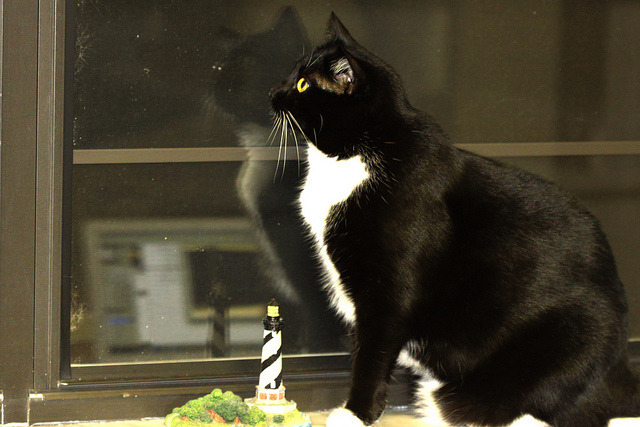

In [7]:
print('Cats often overract to unexpected stimuli \nbecause of their extremely sensitive nervous system.')
Image('https://cdn2.thecatapi.com/images/dia.jpg', width = 400, height = 300)

In [8]:
#make request for random cat picture#need a url and make a request to that url
cat_pic_url = 'https://api.thecatapi.com/v1/images/search'
response = requests.get(cat_pic_url)#request.get()
response


<Response [200]>

In [9]:
#extract the url
cat_data = response.json()#turn our response into json
cat_data

[{'id': 'br1',
  'url': 'https://cdn2.thecatapi.com/images/br1.jpg',
  'width': 600,
  'height': 450}]

In [15]:
#display a random picture of a cat with a random cat fact
cat_data[0]['url']


'https://cdn2.thecatapi.com/images/br1.jpg'

Cats walk on their toes.


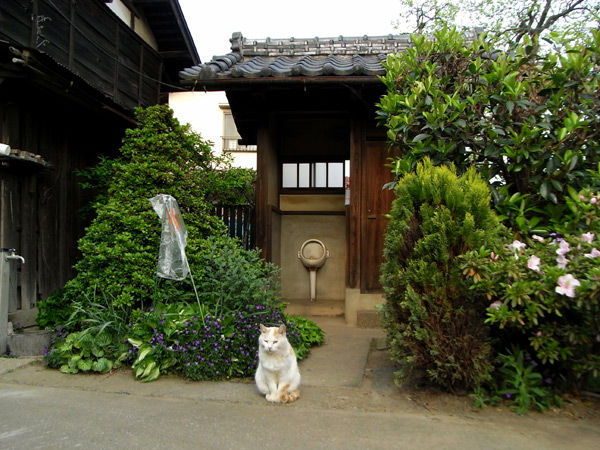

In [17]:
#display a random picture of a cat wirh a random cat fact
response=requests.get(url)
print(response.json()['fact'])
Image(cat_data[0]['url'], width=cat_data[0]['width'], height=cat_data[0]['height'])

### Reading in Data from HTML Tables

Now, we turn to one more approach in accessing data. As we've seen, you may have `json` or `csv` when querying a data API. Alternatively, you may receive HTML data where information is contained in tags.  Below, we examine some basic html tags and their effects.

```html
<h1>A Heading</h1>
<p>A first paragraph</p>
<p>A second paragraph</p>
<table>
  <tr>
    <th>Album</th>
    <th>Rating</th>
  </tr>
  <tr>
    <td>Pink Panther</td>
    <td>10</td>
  </tr>
</table>
```

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

In [ ]:
html = '''
<h1>A Heading</h1>
<p>A first paragraph</p>
<p>A second paragraph</p>
<table>
  <tr>
    <th>Album</th>
    <th>Rating</th>
  </tr>
  <tr>
    <td>Pink Panther</td>
    <td>10</td>
  </tr>
</table>
'''

In [ ]:
from IPython.display import HTML

In [ ]:
HTML(html)

Album,Rating
Pink Panther,10


### Making a request of a url

Let's begin with some basketball information from basketball-reference.com:

- https://www.basketball-reference.com/wnba

The tables on the page will be picked up (hopefully!) by the `read_html` function in pandas.

In [18]:
#visit the url below
url = 'https://www.basketball-reference.com/wnba'

In [20]:
#assign the results as data
#read_html
wnba = pd.read_html(url)

In [21]:
#what kind of object is data?
type(wnba)

list

In [24]:
#first element?
wnba[0]


,Team,W,L,W/L%,GB
0,Minnesota Lynx*,34,10,0.773,—
1,Las Vegas Aces*,30,14,0.682,4.0
2,Atlanta Dream*,30,14,0.682,4.0
3,Phoenix Mercury*,27,17,0.614,7.0
4,New York Liberty*,27,17,0.614,7.0
5,Indiana Fever*,24,20,0.545,10.0
6,Seattle Storm*,23,21,0.523,11.0
7,Golden State Valkyries*,23,21,0.523,11.0
8,Los Angeles Sparks,21,23,0.477,13.0
9,Washington Mystics,16,28,0.364,18.0


In [25]:
wnba[1]

,0,1,2
0,Indiana Fever,98,Final
1,Las Vegas Aces,107,NaN


In [26]:
#examine information
wnba[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    13 non-null     object 
 1   W       13 non-null     int64  
 2   L       13 non-null     int64  
 3   W/L%    13 non-null     float64
 4   GB      13 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 652.0+ bytes


In [27]:
#last dataframe?
wnba[-1]

,Unnamed: 0,PTS,TRB,AST,GmSc
0,A'ja Wilson (LVA),35,8,5,31.8
1,Jackie Young (LVA),32,4,10,29.6
2,Chelsea Gray (LVA),17,2,6,18.8
3,Odyssey Sims (IND),27,2,6,18.4
4,Natasha Howard (IND),16,7,5,11.6


**Example 2**

List of best selling albums from Wikipedia.

- https://en.wikipedia.org/wiki/List_of_best-selling_albums

In [28]:
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_albums'

In [29]:
#read in the tables
tables=pd.read_html(url)

HTTPError: HTTP Error 403: Forbidden

In [ ]:
#how many tables?


In [ ]:
#look at the fourth table


In [ ]:
#try to convert sales to float


In [ ]:
#replace and coerce as float
# fourth_table['Claimed sales*'] = fourth_table['Claimed sales*'].replace({'20[disputed – discuss]': 20}).astype('float')

In [ ]:
#alternative with string method
#fourth_table['Claimed sales*'].str.replace('[disputed – discuss]', '', regex = False)

### Scraping the Web for Data

Sometimes the data is not formatted as an `html` table or `pd.read_html` simply doesn't work.  In these situations you can use the `bs4` library and its `BeautifulSoup` object to parse HTML tags and extract information.  First, make sure you have the library installed and can import it below.

In [ ]:
# pip install -U bs4

In [30]:
from bs4 import BeautifulSoup
import requests

In [31]:
sample_html = '''
<h1>Music Reviews</h1>
<p>This album was awful. <strong>Score</strong>: <i class = "score">2</i></p>
<p class = "good">This album was great. <strong>Score</strong>: <i class = "score">8</i></p>
'''

In [32]:
# create a soup object
soup = BeautifulSoup(sample_html)

In [33]:
# examine the soup
soup


<html><body><h1>Music Reviews</h1>
<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>
<p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>
</body></html>

In [34]:
# find the <p> tags
soup.find('p')


<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>

In [35]:
soup.find_all('p')

[<p>This album was awful. <strong>Score</strong>: <i class="score">2</i></p>,
 <p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>]

In [37]:
# find the i tag
soup.find('i')


<i class="score">2</i>

In [38]:
# find all the i tags
soup.find_all('i')

[<i class="score">2</i>, <i class="score">8</i>]

In [39]:
# find all good paragraphs
soup.find('p',{'class':'good'})



<p class="good">This album was great. <strong>Score</strong>: <i class="score">8</i></p>

#### Extracting Data from a URL

1. Make a request.
2. Turn the request into soup!

In [40]:
url = 'https://pitchfork.com/reviews/albums/'

In [41]:
#make a request
r = requests.get(url)

In [42]:
#examine the text
r.text[0:1000]


'<!DOCTYPE html><html lang="en-US"><head><title>New Albums &amp; Music Reviews | Pitchfork</title><meta charSet="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta name="msapplication-tap-highlight" content="no"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="author" content="Condé Nast"/><meta name="copyright" content="Copyright (c) Condé Nast 2025"/><meta name="description" content="Daily reviews of every important album in music"/><meta name="id" content="65ce02a52126d093a5f585e1"/><meta name="keywords" content="web"/><meta name="news_keywords" content="web"/><meta name="robots" content="index, follow, max-image-preview:large"/><meta name="content-type" content="bundle"/><meta name="parsely-post-id" content="65ce02a52126d093a5f585e1"/><meta name="parsely-metadata" content="{&quot;description&quot;:&quot;Daily reviews of every important album in music&quot;,&quot;image-16-9&quot;:&quot;https://media.pitchfork.com/photos/5935a027a28a0

In [43]:
#turn it into soup!
pitch_soup=BeautifulSoup(r.text)

### Using Inspect

You can inspect an items HTML code by right clicking on the item of interest and selecting **inspect**.  Here, you will see the html tags that surround the object of interest.  

For example, when writing this lesson a recent album review on pitchfork was *Mustafa: Dunya*.  Right clicking on the image of the album cover and choosing inspect showed:

![](https://github.com/jfkoehler/nyu_bootcamp_fa25/blob/master/images/pitch_cover.png?raw=1 )

In [49]:
#find the img tag #control+右击+选择"检查"
img=pitch_soup.find('img')
img.attrs['src']



'/verso/static/pitchfork-us/assets/logo-inverted.svg'

In [ ]:
#extract the url


'/verso/static/pitchfork-us/assets/logo-inverted.svg'

In [50]:
#find all img tags
imgs=pitch_soup.find_all('img')

In [53]:
#explore attributes
len(imgs)

99

In [54]:
#extract source of image url
imgs[:5]

[<img alt="Pitchfork" class="ResponsiveImageContainer-eNxvmU cfBbTk responsive-image__image" sizes="100vw" src="/verso/static/pitchfork-us/assets/logo-inverted.svg" srcset=""/>,
 <img alt="Pitchfork" class="ResponsiveImageContainer-eNxvmU cfBbTk responsive-image__image" sizes="100vw" src="/verso/static/pitchfork-us/assets/logo-header.svg" srcset=""/>,
 <img alt="Through the Wall" class="ResponsiveImageContainer-eNxvmU cfBbTk responsive-image__image" data-src="https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg" loading="eager" src="https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg"/>,
 <img alt="The Art of Loving" class="ResponsiveImageContainer-eNxvmU cfBbTk responsive-image__image" data-src="https://media.pitchfork.com/photos/68d451a69c3c6f55d4d0056c/1:1/w_1600%2Cc_limit/Olivia%2520Dean:%2520The%2520Art%2520of%2520Loving.jpg" loading="eager" src="htt

In [55]:
# extract the genre tags
imgs[2]

<img alt="Through the Wall" class="ResponsiveImageContainer-eNxvmU cfBbTk responsive-image__image" data-src="https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg" loading="eager" src="https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg"/>

In [57]:
imgs[2].attrs['src']

'https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg'

In [58]:
for img in imgs[2:]:
  print(img['src'])

https://media.pitchfork.com/photos/686fda609a8ba5160e24a4f5/1:1/w_1600%2Cc_limit/Rochelle-Jordan-Through-the-Wall.jpeg
https://media.pitchfork.com/photos/68d451a69c3c6f55d4d0056c/1:1/w_1600%2Cc_limit/Olivia%2520Dean:%2520The%2520Art%2520of%2520Loving.jpg
https://media.pitchfork.com/photos/68d4592a6ed8409621157708/1:1/w_1600%2Cc_limit/crushed:%2520no%2520scope.jpg
https://media.pitchfork.com/photos/68d2e2d8e65ab6c4e53d0d3b/1:1/w_1600%2Cc_limit/Doja-Cat-Vie.jpeg
https://media.pitchfork.com/photos/68d2e2decb3272812d7f2419/1:1/w_1600%2Cc_limit/M-Sage-Tender-Wading.jpeg
https://media.pitchfork.com/photos/68d2e68641514ff7aced1edb/1:1/w_1600%2Cc_limit/Xexa-Kissom.jpeg
https://media.pitchfork.com/photos/686c9e74a532685e05d31b79/1:1/w_1600%2Cc_limit/Neko-Case-Neon-Grey-Midnight-Green.jpeg
https://media.pitchfork.com/photos/683f1d0c3fde63fa7e254a8c/1:1/w_1600%2Cc_limit/Cate-Le-Bon-Michelangelo-Dying.jpeg
https://media.pitchfork.com/photos/68d2e4248fa679692ea3b0b0/1:1/w_1600%2Cc_limit/Amanda-Shir

In [60]:
# extract the text from the genres
pitch_soup.find('span',{'class':'rubric_name'}).text

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
all_genres=pitch_soup.find_all('span',{'class':'rubric_name'})

In [ ]:
for span in all_genres:
  print(span.text)

**PROBLEM**

Use the url below to the npr book review site.  Make a request, turn this into a soup object, and use the inspect tool to locate the title of each article on the page.  

In [ ]:
url = 'https://www.npr.org/sections/book-reviews/'

#### Problem

Head over to [Quotes to Scrape](https://quotes.toscrape.com/) and use `requests` and `BeautifulSoup` to extract and structure the quotes as a `DataFrame` similar to that below:

| quote | author | tags |
| ------ | --------- | ------- |
| The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking | Albert Einstein |  [change ,deep-thoughts, thinking, world] |